In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [0]:
df = df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time'], axis = 1)

In [9]:
df.isnull().sum()

Summary    27
Text        0
dtype: int64

In [0]:
df = df.dropna()
df = df.reset_index(drop = True)

In [11]:
df.head()

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


In [0]:
import re
import nltk

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords

In [0]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [0]:
def clean_data(content, remove_stopwords = True):
  content = content.lower()
  content = content.split()
  new_content= []
  
  for word in content:
    if word in contractions:
      new_content.append(contractions[word])
    else:
      new_content.append(word)
  content = " ".join(new_content)

  content = re.sub(r'https?:\/\/.*[\r\n]*', '', content, flags=re.MULTILINE)
  content = re.sub(r'&amp;', '', content) 
  content = re.sub(r'\<a href', ' ', content)
  content = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', content)
  content = re.sub(r'<br />', ' ', content)
  content = re.sub(r'\'', ' ', content)
  
  if remove_stopwords:
    content = content.split()
    content = [word for word in content if not word in set(stopwords.words('english'))]  
    content = ' '.join(content)
   
  return content


In [17]:
clean_data(df['Text'][101], remove_stopwords =True)

'arrived slightly thawed parents would accept however company helpful issued full refund'

In [0]:
clean_texts = []
for text in df.Text:
    clean_texts.append(clean_data(text))
print("Texts are complete.")

In [0]:
import pickle

In [0]:
with open('/content/gdrive/My Drive/Colab Notebooks/text_amazon.data', 'rb') as filehandle:
    # store the data as binary data stream
    clean_texts = pickle.load(filehandle)
    

In [39]:
clean_summaries = []
for summary in df.Summary:
    clean_summaries.append(clean_data(summary, remove_stopwords=False))
print("Summaries are complete.")

Summaries are complete.


In [40]:
for i in range(3):
    print("Clean Review #",i+1)
    print(clean_summaries[i])
    print(clean_texts[i],'\n')
    

Clean Review # 1
good quality dog food
bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better 

Clean Review # 2
not as advertised
product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo 

Clean Review # 3
 delight  says it all
confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis lion witch wardrobe treat seduces edmund selling brother sisters witch 



In [0]:
def count_words(count_dict, text):
  for sentence in text:
    for word in sentence.split():
      if word not in count_dict:
        count_dict[word] = 1
      else:
        count_dict[word] += 1

In [42]:
word_counts = {}

count_words(word_counts, clean_summaries)
count_words(word_counts, clean_texts)
            
print("Size of Vocabulary:", len(word_counts))

Size of Vocabulary: 132887


In [0]:
import matplotlib.pyplot as plt

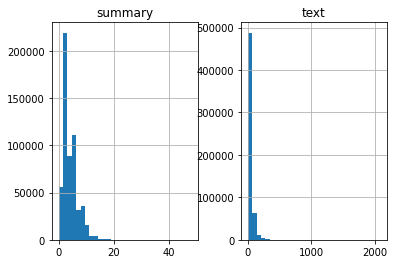

In [44]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in clean_texts:
      text_word_count.append(len(i.split()))

for i in clean_summaries:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [0]:
#We can fix the maximum length of the summary to 13 since that seems to be the majority summary length.

In [48]:
cnt=0
for i in clean_summaries:
    if(len(i.split())<=11):
        cnt=cnt+1
print(cnt/len(clean_summaries)*100)

98.22087972598065


In [49]:
cnt=0
for i in clean_texts:
    if(len(i.split())<=80):
        cnt=cnt+1
print(cnt/len(clean_texts)*100)

89.32756536899197


In [0]:
max_text_length = 80
max_summary_length = 11

In [51]:
sorted_summaries = []
sorted_texts = []

for i in range(len(clean_texts)):
  if(len(clean_summaries[i].split())<=max_summary_length and len(clean_texts[i].split())<=max_text_length):
    sorted_summaries.append(clean_summaries[i])
    sorted_texts.append(clean_texts[i])

print(len(sorted_summaries))
print(len(sorted_texts))
    

501121
501121


In [0]:
sorted_summaries = list(map(lambda x: 'starttok '+ x + ' endtok', sorted_summaries))

In [53]:
type(clean_summaries)

list

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(np.array(sorted_texts),np.array(sorted_summaries), test_size = 0.1, random_state=0)

In [0]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

In [0]:
## Text Tokenizer

In [0]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_train))

In [59]:
threshold = 5       #assumed

count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key,value in x_tokenizer.word_counts.items():
  total_count = total_count + 1
  total_frequency = total_frequency + value
  if(value < threshold):
    count = count + 1
    frequency = frequency + value

print("% of rare words in vocabulary:",(count/total_count)*100)
print("Total Coverage of rare words:",(frequency/total_frequency)*100)


% of rare words in vocabulary: 63.070891553016274
Total Coverage of rare words: 0.6293404866483184


In [60]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words = total_count - count)
x_tokenizer.fit_on_texts(list(x_train))

#convert text sequences into integer sequences
x_train = x_tokenizer.texts_to_sequences(x_train)
x_test = x_tokenizer.texts_to_sequences(x_test)

#padding zero upto maximum length
x_train = pad_sequences(x_train, maxlen = max_text_length, padding='post')
x_test = pad_sequences(x_test, maxlen = max_text_length, padding='post')

text_vocab_size = x_tokenizer.num_words + 1
print(text_vocab_size)

30897


In [0]:
## Summary Tokenizer

In [0]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

In [63]:
threshold = 7

count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key,value in y_tokenizer.word_counts.items():
  total_count = total_count + 1
  total_frequency = total_frequency + value
  if(value < threshold):
    count = count + 1
    frequency = frequency + value

print("% of rare words in vocabulary:",(count/total_count)*100)
print("Total Coverage of rare words:",(frequency/total_frequency)*100)


% of rare words in vocabulary: 72.48275623028665
Total Coverage of rare words: 1.526050968214065


In [64]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words = total_count - count)
y_tokenizer.fit_on_texts(list(y_train))

#convert text sequences into integer sequences
y_train = y_tokenizer.texts_to_sequences(y_train)
y_test = y_tokenizer.texts_to_sequences(y_test)

#padding zero upto maximum length
y_train = pad_sequences(y_train, maxlen = max_summary_length, padding='post')
y_test = pad_sequences(y_test, maxlen = max_summary_length, padding='post')

summary_vocab_size = y_tokenizer.num_words + 1
print(summary_vocab_size)

7940


In [65]:
y_tokenizer.word_counts["starttok"],len(y_train)

(451008, 451008)

In [0]:
#deleting the rows that contain only 'starttok' and 'endtok'

In [0]:
ind=[]
for i in range(len(y_train)):
    count=0
    for j in y_train[i]:
        if j!=0:
            count=count+1
    if(count==2):
        ind.append(i)

y_train=np.delete(y_train,ind, axis=0)
x_train=np.delete(x_train,ind, axis=0)

In [0]:
ind=[]
for i in range(len(y_test)):
    count=0
    for j in y_test[i]:
        if j!=0:
            count=count+1
    if(count==2):
        ind.append(i)

y_test=np.delete(y_test,ind, axis=0)
x_test=np.delete(x_test,ind, axis=0)

In [0]:
#Model

In [0]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K
!cp "/content/gdrive/My Drive/Colab Notebooks/attention_layer.py" .
from attention_layer import AttentionLayer

In [0]:
K.clear_session()
latent_dim = 500

#Encoder 
encoder_inputs = Input(shape = (max_text_length,))

#embedding layer
enc_emb = Embedding(text_vocab_size, latent_dim,trainable = True)(encoder_inputs)

#LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output1, state_h1, state_c1 = encoder = encoder_lstm1(enc_emb)

#LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_output2, state_h2, state_c2 = encoder = encoder_lstm2(encoder_output1)

#LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder = encoder_lstm3(encoder_output2)

In [80]:
#Set up decoder
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(summary_vocab_size, latent_dim, trainable = True)
dec_emb = dec_emb_layer(decoder_inputs)

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences = True, return_state = True)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

#Concat attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs,attn_out])

#Dense Layer
decoder_dense = TimeDistributed(Dense(summary_vocab_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 500)      15448500    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 80, 500), (N 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [0]:
#using sparse categorical cross-entropy as the loss function since it converts the integer sequence to a one-hot vector on the fly. This overcomes any memory issues.

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [0]:
#model will stop training once the validation loss increases:

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [0]:
#training the model on a batch size of 128

In [86]:
history=model.fit([x_train,y_train[:,:-1]], y_train.reshape((y_train.shape[0],y_train.shape[1], 1))[:,1:] ,epochs=10,callbacks=[es],batch_size=128, validation_data=([x_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))


Epoch 1/10
3494/3494 [==============================] - 1070s 306ms/step - loss: 1.9833 - val_loss: 1.7599
Epoch 2/10
3494/3494 [==============================] - 1069s 306ms/step - loss: 1.6755 - val_loss: 1.6416
Epoch 3/10
3494/3494 [==============================] - 1065s 305ms/step - loss: 1.5549 - val_loss: 1.5782
Epoch 4/10
3494/3494 [==============================] - 1061s 304ms/step - loss: 1.4692 - val_loss: 1.5379
Epoch 5/10
3494/3494 [==============================] - 1063s 304ms/step - loss: 1.4041 - val_loss: 1.5015
Epoch 6/10
3494/3494 [==============================] - 1069s 306ms/step - loss: 1.3528 - val_loss: 1.4828
Epoch 7/10
3494/3494 [==============================] - 1072s 307ms/step - loss: 1.3114 - val_loss: 1.4613
Epoch 8/10
3494/3494 [==============================] - 1068s 306ms/step - loss: 1.2729 - val_loss: 1.4435
Epoch 9/10
3494/3494 [==============================] - 1066s 305ms/step - loss: 1.2392 - val_loss: 1.4388
Epoch 10/10
3494/3494 [==============

In [0]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [88]:
target_word_index

{'starttok': 1,
 'endtok': 2,
 'great': 3,
 'good': 4,
 'the': 5,
 'not': 6,
 'for': 7,
 'a': 8,
 'best': 9,
 'and': 10,
 'it': 11,
 'love': 12,
 'my': 13,
 'coffee': 14,
 'this': 15,
 'tea': 16,
 'i': 17,
 'but': 18,
 'is': 19,
 'product': 20,
 'delicious': 21,
 'to': 22,
 'of': 23,
 'taste': 24,
 'very': 25,
 'excellent': 26,
 'flavor': 27,
 'dog': 28,
 'these': 29,
 'in': 30,
 'like': 31,
 'yummy': 32,
 'food': 33,
 'price': 34,
 'tasty': 35,
 's': 36,
 'favorite': 37,
 'ever': 38,
 'you': 39,
 'too': 40,
 'as': 41,
 'so': 42,
 'with': 43,
 'loves': 44,
 'stuff': 45,
 'are': 46,
 'snack': 47,
 'on': 48,
 'dogs': 49,
 'better': 50,
 'just': 51,
 'healthy': 52,
 'free': 53,
 'awesome': 54,
 'have': 55,
 'yum': 56,
 'chocolate': 57,
 'no': 58,
 'them': 59,
 'what': 60,
 'tastes': 61,
 'wonderful': 62,
 'perfect': 63,
 'nice': 64,
 'than': 65,
 'cat': 66,
 'treat': 67,
 'really': 68,
 'sweet': 69,
 'quality': 70,
 'chips': 71,
 'do': 72,
 'tasting': 73,
 'at': 74,
 'treats': 75,
 'one':

In [0]:
#Inference

In [0]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_length,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['starttok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='endtok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'endtok'  or len(decoded_sentence.split()) >= (max_summary_length-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence


In [0]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['starttok']) and i!=target_word_index['endtok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [98]:
for i in range(0,100):
  print("Review #",i+1)
  print("Review:",seq2text(x_train[i]))
  print("Original summary:",seq2summary(y_train[i]))
  print("Predicted summary:",decode_sequence(x_train[i].reshape(1,max_text_length)))
  print("\n")

Review # 1
Review: espresso addicts 365 days year caps lattes become favorite rich crema really super amazon subscription program affordable 
Original summary: lavazza super crema 
Predicted summary:  espresso at home


Review # 2
Review: tried crystal light product liked much right next glass similar product kellogs horrible made realize far superior crystal light version 
Original summary: so much better than the competition 
Predicted summary:  not good


Review # 3
Review: distracted horribly chewy texture remember much taste granny smith apples crunchy tasty neither kids enjoyed pears 
Original summary: texture like beef jerky 
Predicted summary:  not so great


Review # 4
Review: heinz beans cost 2 stop shop brit hubby eat bean gets cost tolerate thanks amazon 
Original summary: thank goodness for amazon 
Predicted summary:  best beans ever


Review # 5
Review: bit sweet son baby sweet tooth 
Original summary: great taste 
Predicted summary:  great taste


Review # 6
Review: far 